In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

In [3]:
filename = r'/Users/fanchang/Downloads/948AZ07907_combo1_retest.csv'
df = pd.read_csv(filename)
df.head()

,China Date Time,Test Name,Station Id,Slot Id,Overall Status,Phase Time,Phase Name,Measurement Name,Measurement Status,LSL,RESULT,USL,RESULT TEXT,Failure Code
0,2019-04-10 11:31:05,COMBO,F7-3F-G601COMBO01,0,FAIL,0.044,FrontSfrTestInfCollect,SFR_110lp_Center_V,PASS,0.46,0.5651,1.0,0.5651,NaN
1,2019-04-10 11:31:05,COMBO,F7-3F-G601COMBO01,0,FAIL,0.044,FrontSfrTestInfCollect,SFR_110lp_Center_H,PASS,0.46,0.6094,1.0,0.6094,NaN
2,2019-04-10 11:31:05,COMBO,F7-3F-G601COMBO01,0,FAIL,0.044,FrontSfrTestInfCollect,SFR_110lp_30IH_TL_V,PASS,0.35,0.6610,1.0,0.6610,NaN
3,2019-04-10 11:31:05,COMBO,F7-3F-G601COMBO01,0,FAIL,0.044,FrontSfrTestInfCollect,SFR_110lp_30IH_TL_H,PASS,0.35,0.6439,1.0,0.6439,NaN
4,2019-04-10 11:31:05,COMBO,F7-3F-G601COMBO01,0,FAIL,0.044,FrontSfrTestInfCollect,SFR_110lp_30IH_TR_V,PASS,0.35,0.6645,1.0,0.6645,NaN


In [4]:
df.columns

Index([u'China Date Time', u'Test Name', u'Station Id', u'Slot Id',
       u'Overall Status', u'Phase Time', u'Phase Name', u'Measurement Name',
       u'Measurement Status', u'LSL', u'RESULT', u'USL', u'RESULT TEXT',
       u'Failure Code'],
      dtype='object')

In [5]:
df = df.drop(columns=['Failure Code'])
df.head()

,China Date Time,Test Name,Station Id,Slot Id,Overall Status,Phase Time,Phase Name,Measurement Name,Measurement Status,LSL,RESULT,USL,RESULT TEXT
0,2019-04-10 11:31:05,COMBO,F7-3F-G601COMBO01,0,FAIL,0.044,FrontSfrTestInfCollect,SFR_110lp_Center_V,PASS,0.46,0.5651,1.0,0.5651
1,2019-04-10 11:31:05,COMBO,F7-3F-G601COMBO01,0,FAIL,0.044,FrontSfrTestInfCollect,SFR_110lp_Center_H,PASS,0.46,0.6094,1.0,0.6094
2,2019-04-10 11:31:05,COMBO,F7-3F-G601COMBO01,0,FAIL,0.044,FrontSfrTestInfCollect,SFR_110lp_30IH_TL_V,PASS,0.35,0.6610,1.0,0.6610
3,2019-04-10 11:31:05,COMBO,F7-3F-G601COMBO01,0,FAIL,0.044,FrontSfrTestInfCollect,SFR_110lp_30IH_TL_H,PASS,0.35,0.6439,1.0,0.6439
4,2019-04-10 11:31:05,COMBO,F7-3F-G601COMBO01,0,FAIL,0.044,FrontSfrTestInfCollect,SFR_110lp_30IH_TR_V,PASS,0.35,0.6645,1.0,0.6645


In [6]:
df_fail = df[df['Measurement Status']=='FAIL']
len(df_fail)

14

In [7]:
df_fail['Measurement Name'].value_counts

<bound method Series.value_counts of 13       SFR_110lp_60IH_TR_H
21       SFR_110lp_80IH_TR_H
27     corner_balance_IH80_H
69       SFR_110lp_60IH_TR_H
76       SFR_110lp_80IH_TR_V
77       SFR_110lp_80IH_TR_H
79       SFR_110lp_80IH_BR_H
82     corner_balance_IH80_V
83     corner_balance_IH80_H
97       SFR_110lp_60IH_TR_H
99       SFR_110lp_60IH_BR_H
105      SFR_110lp_80IH_TR_H
107      SFR_110lp_80IH_BR_H
111    corner_balance_IH80_H
Name: Measurement Name, dtype: object>

In [8]:
pd.value_counts(df_fail['Measurement Name']).sort_index()

SFR_110lp_60IH_BR_H      1
SFR_110lp_60IH_TR_H      3
SFR_110lp_80IH_BR_H      2
SFR_110lp_80IH_TR_H      3
SFR_110lp_80IH_TR_V      1
corner_balance_IH80_H    3
corner_balance_IH80_V    1
Name: Measurement Name, dtype: int64

In [9]:
pd.value_counts(df_fail['Measurement Name'])

SFR_110lp_60IH_TR_H      3
corner_balance_IH80_H    3
SFR_110lp_80IH_TR_H      3
SFR_110lp_80IH_BR_H      2
SFR_110lp_80IH_TR_V      1
SFR_110lp_60IH_BR_H      1
corner_balance_IH80_V    1
Name: Measurement Name, dtype: int64

In [10]:
def histogram_boxplot(data, xlabel = None, title = None, font_scale=1.2, figsize=(8, 6), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 1.2)
    figsize: size of fig (default (8, 6))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(np.random.rand(100), bins = 20, title="Fancy plot")
    """

    sns.set(font_scale=font_scale)
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    sns.boxplot(data, ax=ax_box2)
    sns.distplot(data, ax=ax_hist2, bins=bins) if bins else sns.distplot(data, ax=ax_hist2)
    ax_box2.set(xlabel='')
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title)
    plt.show()

       China Date Time Test Name         Station Id  Slot Id Overall Status  \
0  2019-04-10 11:31:05     COMBO  F7-3F-G601COMBO01        0           FAIL   
1  2019-04-10 11:31:05     COMBO  F7-3F-G601COMBO01        0           FAIL   
2  2019-04-10 11:31:05     COMBO  F7-3F-G601COMBO01        0           FAIL   
3  2019-04-10 11:31:05     COMBO  F7-3F-G601COMBO01        0           FAIL   
4  2019-04-10 11:31:05     COMBO  F7-3F-G601COMBO01        0           FAIL   

   Phase Time              Phase Name     Measurement Name Measurement Status  \
0       0.044  FrontSfrTestInfCollect   SFR_110lp_Center_V               PASS   
1       0.044  FrontSfrTestInfCollect   SFR_110lp_Center_H               PASS   
2       0.044  FrontSfrTestInfCollect  SFR_110lp_30IH_TL_V               PASS   
3       0.044  FrontSfrTestInfCollect  SFR_110lp_30IH_TL_H               PASS   
4       0.044  FrontSfrTestInfCollect  SFR_110lp_30IH_TR_V               PASS   

    LSL  RESULT  USL  RESULT TEXT  
0 

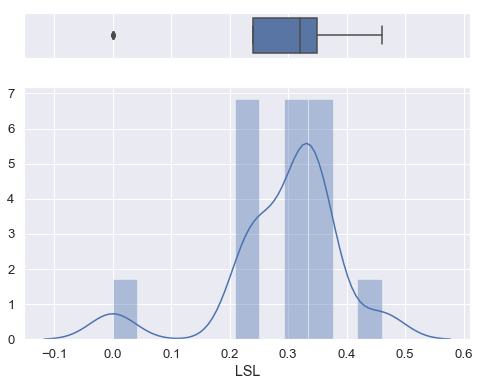

In [13]:
print(df.head())
histogram_boxplot(df[df.columns[9]])

LinAlgError: singular matrix

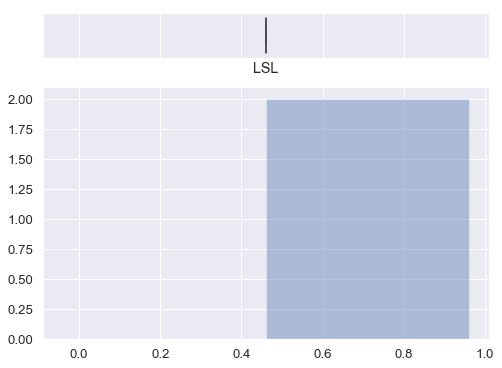

In [12]:
newdf=df[df['Measurement Name']=='SFR_110lp_Center_V']
histogram_boxplot(newdf[newdf.columns[9]])